In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style("dark")

from datetime import date
from mpr.cash_index import get_cash_prices

cash_prices = await get_cash_prices(date(2015, 1, 1))

In [2]:
# What were the average prices for the last 10 days?
cash_prices.get(['Daily Avg Price', 'Price Change', 'CME Index', 'Index Change']).tail(10)

,Daily Avg Price,Price Change,CME Index,Index Change
date,,,,
2019-07-05,71.45,-1.13,72.03,-0.79
2019-07-08,70.96,-0.49,71.20,-0.83
2019-07-09,70.60,-0.36,70.77,-0.43
2019-07-10,70.69,0.09,70.65,-0.12
2019-07-11,70.77,0.08,70.73,0.08
2019-07-12,70.70,-0.07,70.73,0.00
2019-07-15,70.53,-0.17,70.62,-0.11
2019-07-16,71.03,0.50,70.79,0.17
2019-07-17,72.05,1.02,71.52,0.73


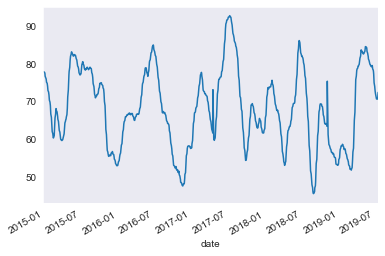

In [3]:
# Plot the CME Index on a chart
cash_prices.get('CME Index').plot()

In [4]:
# view the full report since March
cash_prices['2019-03-01':]

,CME Index,Index Change,Daily Avg Price,Price Change,Negotiated Head Count,Negotiated Carcass Weight,Negotiated Net Price,Market Formula Head Count,Market Formula Carcass Weight,Market Formula Net Price
date,,,,,,,,,,
2019-03-01,51.93,-0.20,51.98,0.12,15820,209.62,48.30,193841,215.46,52.27
2019-03-04,51.94,0.01,51.87,-0.11,8675,206.74,47.19,118060,214.34,52.20
2019-03-05,51.85,-0.09,51.83,-0.04,8504,202.11,46.78,126907,213.58,52.15
2019-03-06,51.75,-0.10,51.67,-0.16,8555,198.16,46.58,125809,214.09,51.99
2019-03-07,51.71,-0.04,51.74,0.07,10792,202.63,46.60,115052,213.97,52.20
2019-03-08,51.98,0.27,52.14,0.40,17749,206.92,46.74,165596,214.61,52.70
2019-03-11,52.38,0.40,52.76,0.62,5293,202.82,46.38,114453,212.53,53.04
2019-03-12,53.12,0.74,53.46,0.70,6475,192.82,47.11,122334,212.52,53.77
2019-03-13,54.13,1.01,54.79,1.33,7863,200.16,47.61,119543,214.37,55.23


In [5]:
from fbprophet import Prophet
import pandas as pd

df = cash_prices['CME Index'].to_frame().reset_index()
df.columns=['ds', 'y']

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
m = Prophet(weekly_seasonality=0)
m.fit(df)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
fig = m.plot(forecast)

In [ ]:
predictions = forecast.set_index(forecast['ds']).loc['2019-4-15':'2019-8-1']
predictions[['yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_yearly
plot_yearly(m)